# <font color="red">Batch Gradient Descent</font>


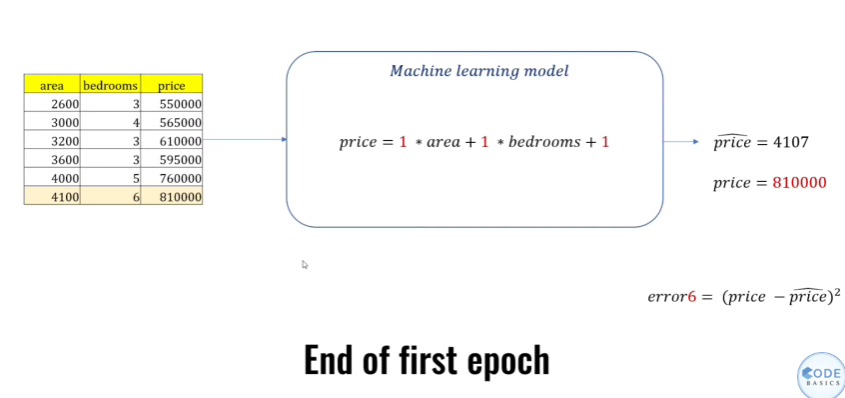


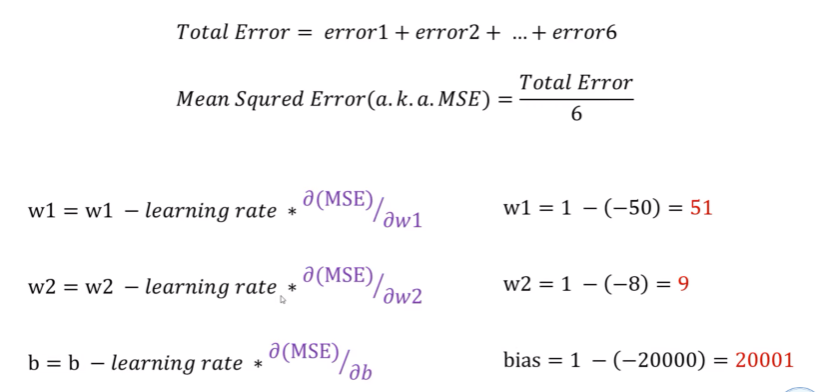


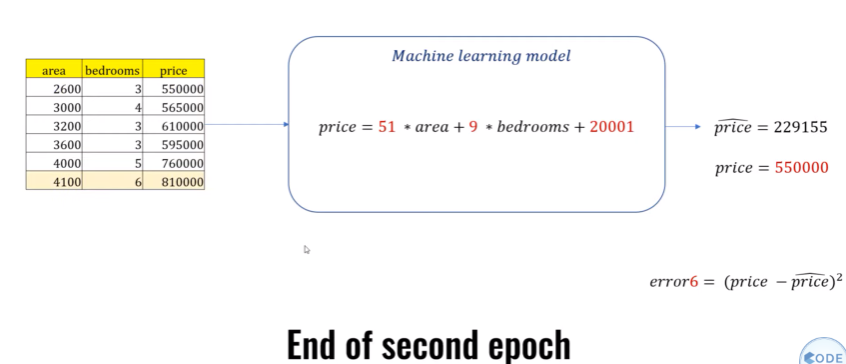


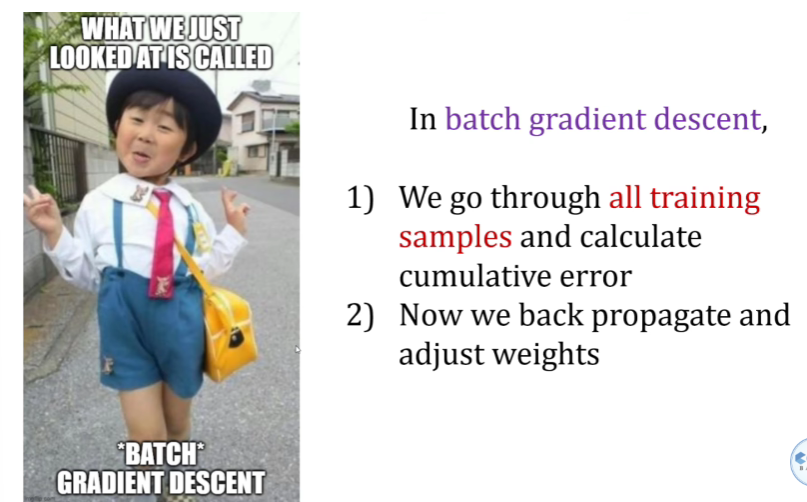


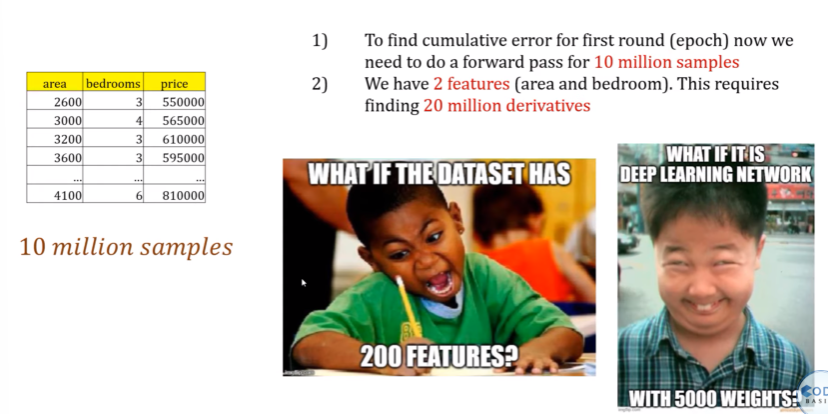


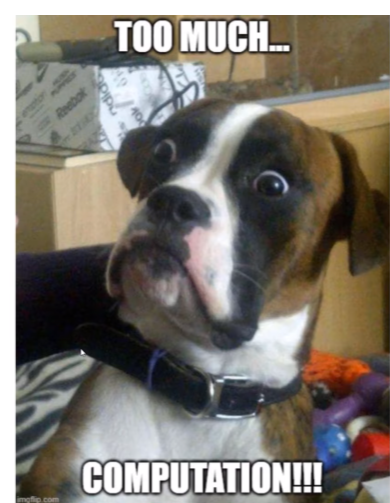


# <font color="red">Stochastic Gradient Descent</font>


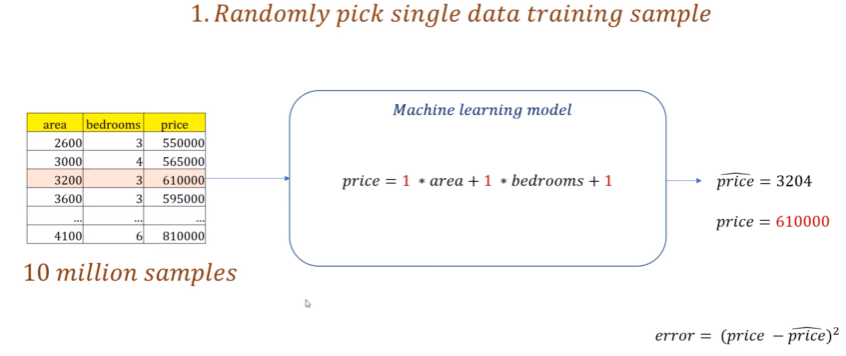


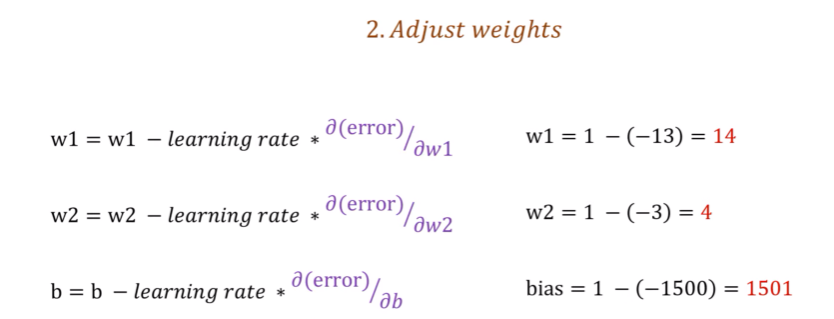


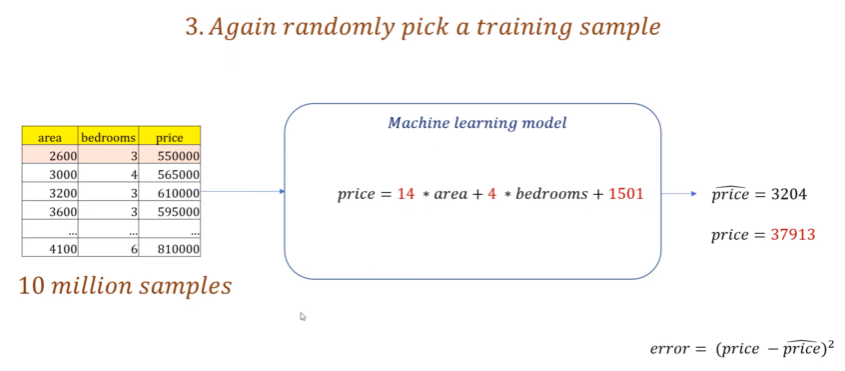


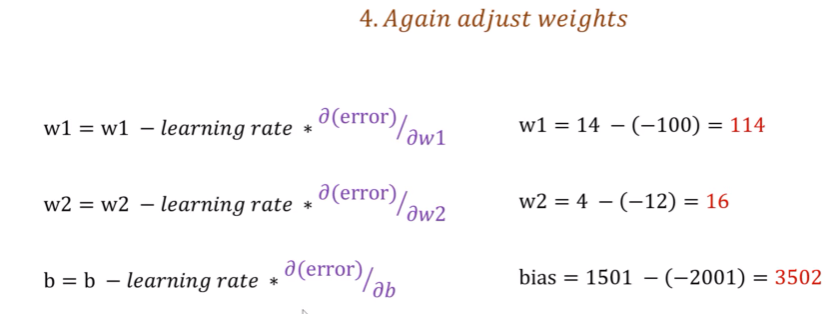


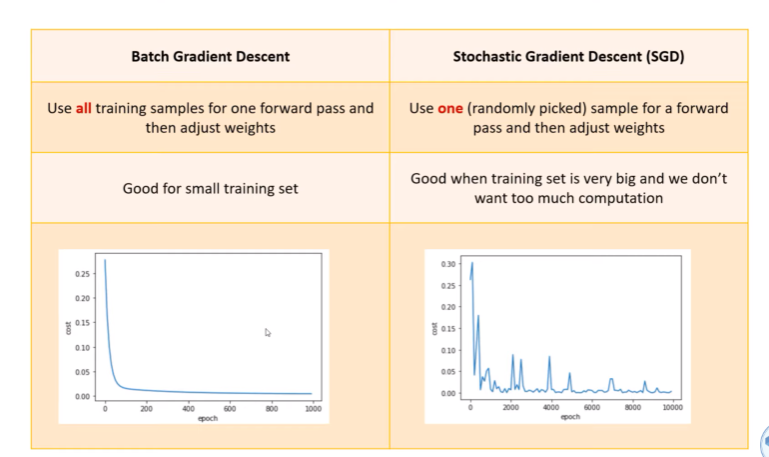


# <font color="red">Mini Batch Gradient Descent</font>


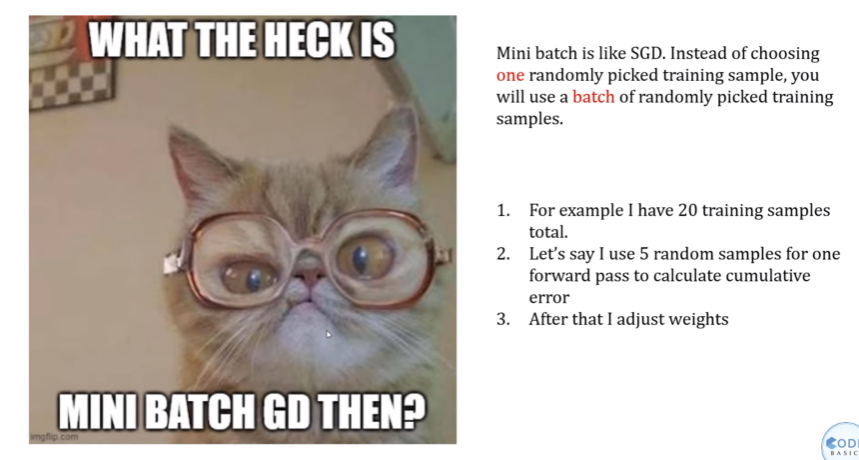


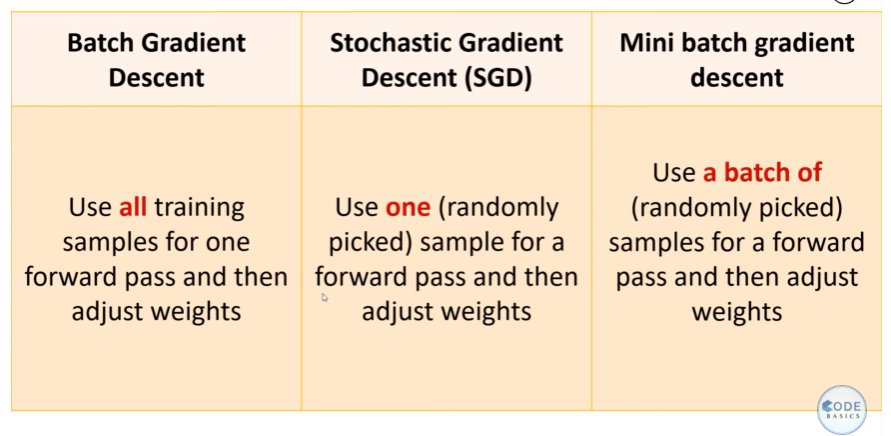


## <font color="red"> Implementation of stochastic and batch grandient descent in python</font>

**We will use very simple home prices data set to implement batch and stochastic gradient descent in python. Batch gradient descent uses all training samples in forward pass to calculate cumulitive error and than we adjust weights using derivaties. In stochastic GD, we randomly pick one training sample, perform forward pass, compute the error and immidiately adjust weights. So the key difference here is that to adjust weights batch GD will use all training samples where as stochastic GD will use one randomly picked training sample**


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

**Load the dataset in pandas dataframe**


In [2]:
df = pd.read_csv('homeprice_banglore.csv')
df.sample(5)

,area,bedrooms,price
10,1800,3,82.0
17,1540,3,60.0
16,1180,3,48.0
11,2785,4,140.0
19,800,1,32.0


**Preprocessing/Scaling: Since our columns are on different sacle it is important to perform scaling on them**


In [3]:
from sklearn import preprocessing

sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_x = sx.fit_transform(df.drop('price', axis=1))

scaled_x

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [4]:
scaled_y = sy.fit_transform(df[['price']].values.reshape(df.shape[0], 1))
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

**We should convert target column (i.e. price) into one dimensional array. It has become 2D due to scaling that we did above but now we should change to 1D**


In [5]:
# scaled_y.reshape(20, )

**Gradient descent allows you to find weights (w1,w2,w3) and bias in following linear equation for housing price prediction**
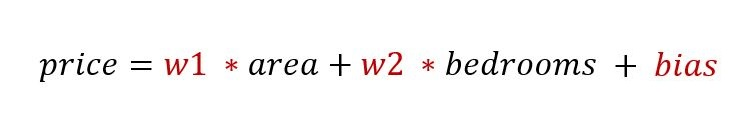

**Now is the time to implement mini batch gradient descent.**


In [6]:
def batch_gradient_descent(X, y_true, epochs, learning_rate=0.01):
    number_of_features = X.shape[1]
    # numpy array with 1 row and columns equal to number of features. In
    # our case number_of_features = 2 (area, bedroom)
    weights = np.ones(shape=(number_of_features))
    bias = 0
    total_samples = X.shape[0]

    cost_list = []
    epoch_list = []

    for epoch in range(epochs):
        y_pred = np.dot(weights, X.T) + bias

        # w_grad and b_grad are derivaties of loss(y_true - y_pred) respect  to weights and bias
        w_grad = -(2/total_samples) * (X.T.dot(y_true - y_pred))
        b_grad = -(2/total_samples) * np.sum(y_true - y_pred)

        weights = weights - (learning_rate * w_grad)
        bias = bias - (learning_rate * b_grad)

        cost = np.mean(np.square((y_true - y_pred)))
        if epoch % 10 == 0:
            cost_list.append(cost)
            epoch_list.append(epoch)

    return weights, bias, cost, cost_list, epoch_list


weights, bias, cost, cost_list, epoch_list = batch_gradient_descent(scaled_x, scaled_y.reshape(scaled_y.shape[0],), 500)
weights, bias, cost

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

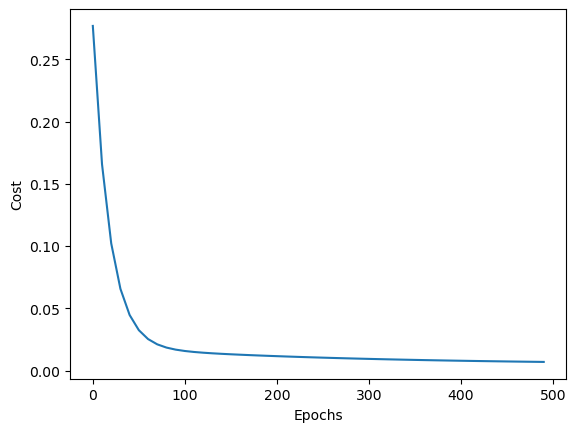

In [7]:
plt.plot(epoch_list, cost_list)
plt.xlabel('Epochs')
plt.ylabel('Cost')

plt.show()

In [8]:
def predict(area, bedrooms, weights, bias):
    scaled_x = sx.transform([[area, bedrooms]])[0]
    # here w1 = w[0] , w2 = w[1], w3 = w[2] and bias is b
    # equation for price is w1*area + w2*bedrooms + w3*age + bias
    # scaled_X[0] is area
    # scaled_X[1] is bedrooms
    # scaled_X[2] is age
    scaled_price = weights[0]*scaled_x[0]+weights[1]*scaled_x[1] + bias
    # once we get price prediction we need to to rescal it back to original value
    # also since it returns 2D array, to get single value we need to do value[0][0]
    return sy.inverse_transform([[scaled_price]])[0][0]


predict(1800, 3, weights, bias)

c:\Users\91630\.conda\envs\ml_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


79.35396924755915

# <font color="red"> 2) Stochastic Gradient Descent Implementation</font>


In [9]:
# we will use random libary to pick random training sample.
import random
random.randint(0, 6)  # randit gives random number between two numbers specified in the argument

4

In [10]:
def stochastic_gradient_descent(X, y_true, epochs, learning_rate=0.01):
    number_of_features = X.shape[1]
    weights = np.ones(shape=(number_of_features))
    bias = 0
    total_samples = X.shape[0]

    cost_list = []
    epoch_list = []

    for epoch in range(epochs):
        # pick random sample from dataset
        random_sample_index = random.randint(0, total_samples - 1)
        sample_x = X[random_sample_index]
        sample_y = y_true[random_sample_index]

        y_pred = np.dot(weights, sample_x.T) + bias

        w_grad = -(2/total_samples) * (sample_x.T.dot(sample_y - y_pred))
        b_grad = -(2/total_samples) * np.sum(sample_y - y_pred)

        weights = weights - (learning_rate * w_grad)
        bias = bias - (learning_rate * b_grad)

        cost = np.mean(np.square((sample_y - y_pred)))
        if epoch % 10 == 0:
            cost_list.append(cost)
            epoch_list.append(epoch)

    return weights, bias, cost, cost_list, epoch_list


weights_sgd, bias_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gradient_descent(
    scaled_x, scaled_y.reshape(scaled_y.shape[0],), 1000)
weights_sgd, bias_sgd, cost_sgd

(array([0.86438738, 0.83754747]), -0.2519525536641808, 0.035904979679034485)

In [11]:
weights, bias, cost

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

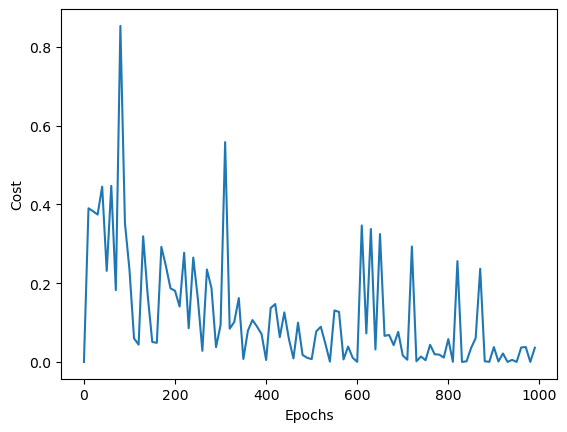

In [12]:
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.plot(epoch_list_sgd, cost_list_sgd, label='Stochastic Gradient Descent')
plt.show()

**Implement mini batch gradient descent in python and plot cost vs epoch graph. Mini batch is intermediate version of batch GD and stochastic GD. In stochastic we used one randomly picked training sample, In mini gradient descent you will use a batch of samples in each iterations. For example if you have total 50 training samples, you can take a batch of 10 samples, calculate cumulitive error for those 10 samples and then adjust weights. In SGD we adjust weights after every one sample. In Batch we adjust weights after going through all samples but in mini batch we do after every m samples (where m is batch size and it is 0 < m < n, where n is total number of samples**


In [13]:
df = pd.read_csv('homeprice_banglore.csv')
df.sample(5)

,area,bedrooms,price
5,1170,2,38.0
14,2250,3,101.0
12,1000,2,38.0
17,1540,3,60.0
11,2785,4,140.0


**Preprocessing/Scaling: Since our columns are on different sacle it is important to perform scaling on them**


In [16]:
from sklearn import preprocessing

sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_x = sx.fit_transform(df.drop('price', axis=1))
scaled_y = sy.fit_transform(df[['price']])
scaled_x

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [17]:
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

**Preprocessing/Scaling: Since our columns are on different sacle it is important to perform scaling on them**


In [18]:
scaled_y.reshape(scaled_y.shape[0],)

array([0.05237037, 0.65185185, 0.22222222, 0.31851852, 0.14074074,
       0.04444444, 0.76296296, 0.91111111, 0.13333333, 1.        ,
       0.37037037, 0.8       , 0.04444444, 0.05925926, 0.51111111,
       0.07407407, 0.11851852, 0.20740741, 0.51851852, 0.        ])

In [19]:
np.random.permutation(20)

array([18, 15, 11, 14,  3, 13,  9, 19, 17, 12,  4,  7,  0, 16,  8,  1,  2,
       10,  5,  6])

In [30]:
def mini_batch_gradient_descent(scaled_x, scaled_y, epochs, batch_size, learning_rate=0.01):
    number_of_features = scaled_x.shape[1]
    weight = np.ones(shape=(number_of_features))
    bias = 0
    total_samples = scaled_x.shape[0]

    if batch_size > total_samples:  # In this case mini batch becomes same as batch gradient descent
        batch_size = total_samples

    cost_list = []
    epoch_list = []
    num_batches = int(total_samples/batch_size)

    for epoch in range(epochs):
        random_indicies = np.random.permutation(total_samples)
        x_temp = scaled_x[random_indicies]
        y_temp = scaled_y[random_indicies]

        for batch in range(num_batches):
            x_batch = x_temp[batch:batch+batch_size]
            y_batch = y_temp[batch:batch+batch_size]

            y_pred = np.dot(weight, x_batch.T) + bias

            w_grad = -(2/batch_size) * (x_batch.T.dot(y_batch - y_pred))
            b_grad = -(2/batch_size) * np.sum(y_batch - y_pred)

            weight = weight - (learning_rate * w_grad)
            bias = bias - (learning_rate * b_grad)

            cost = np.mean(np.square((y_batch - y_pred)))

        if epoch % 10 == 0:
            cost_list.append(cost)
            epoch_list.append(epoch)

    return weight, bias, cost, cost_list, epoch_list


weights_mb, bias_mb, cost_mb, cost_list_mb, epoch_list_mb = mini_batch_gradient_descent(
    scaled_x, scaled_y.reshape(scaled_y.shape[0],), 500, 5)

weights_mb, bias_mb, cost_mb

(array([0.66625088, 0.52217844]), -0.1306185594303218, 0.003995242615292747)

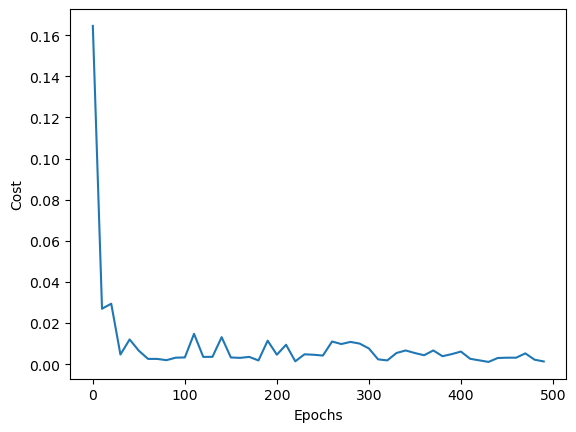

In [27]:
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.plot(epoch_list_mb, cost_list_mb)
plt.show()

In [ ]:
def predict(area, bedrooms, weights, bias):
    scaled_x = sx.transform([[area, bedrooms]])[0]
    scaled_price = weights[0]*scaled_x[0]+weights[1]*scaled_x[1] + bias
    return sy.inverse_transform([[scaled_price]])[0][0]


predict(2600, 4, weights_mb, bias_mb)

c:\Users\91630\.conda\envs\ml_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


123.75964711837682

In [29]:
predict(1800, 3, weights_mb, bias_mb)

c:\Users\91630\.conda\envs\ml_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


80.4824864607966